![alt text](<화면 캡처 2025-06-02 201331.png>)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
data = pd.read_csv('xy.dat', sep=r'\s+', names=['x','y', 'err_y'])
print(data.shape)
print(data.describe())
x = data['x'].values
y = data['y'].values
y_err = data['err_y'].values

(14, 3)
               x          y      err_y
count  14.000000  14.000000  14.000000
mean    6.864286  13.947857   2.005000
std     3.563621   7.761888   0.813783
min     2.000000   4.280000   0.990000
25%     3.875000   6.077500   1.305000
50%     6.750000  13.040000   2.000000
75%     9.275000  20.235000   2.702500
max    12.800000  25.890000   3.220000


In [17]:
def CS_2d(vars, data):
    a = vars[0]; b = vars[1]
    res = np.sum(((data['y'] - a - b * data['x'])/data['err_y'])**2)
    return res

In [19]:
def downhill(pos, data, dim=2):
    N = dim + 1
    CS_res = np.zeros(N)
    for _ in range(N):
        CS_res[_] = CS_2d(pos[_], data)
    
    i_min = np.argmax(CS_res)
    
    var = np.mean([pos[j] for j in range(N) if j != i_min], axis=0)
   
    ref = var + 1 * (var - pos[i_min])
    CS_ref = CS_2d(ref, data)
    
    var_min = np.min([CS_res[j] for j in range(N) if j != i_min])
    var_max = np.max([CS_res[j] for j in range(N) if j != i_min])
    
    if CS_ref < var_min:
        expand = var + 2 * (var - pos[i_min])
        CS_exp = CS_2d(expand, data)
        if CS_exp < CS_ref: ref = expand
    
    elif CS_ref > var_max:
        cont = var + 0.5 * (var - pos[i_min])
        CS_cont = CS_2d(cont, data)
        if CS_cont < CS_ref: ref = cont
        else:
            for ind in range(N):
                pos[ind] = (pos[ind] + pos[i_min]) / 2
    
    pos[i_min] = ref
    
    return pos

In [20]:
from matplotlib.colors import LogNorm
import matplotlib.patches as patches

C:\Users\AGN\AppData\Local\Temp\ipykernel_11788\282503557.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


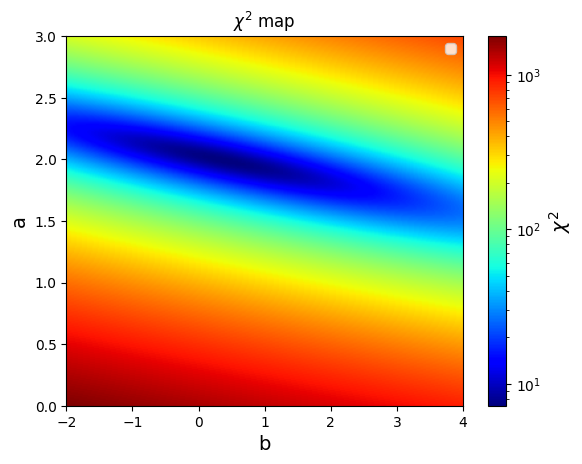

In [26]:
X, Y = np.meshgrid(np.linspace(-2, 4, 300), np.linspace(0, 3, 300))

#numpy broadcasting! 
# x, y , y_err are shape of (14,)
# X, Y are shape of (300,300)
# To broadcast, Extend x, y, y_err to (14, 1, 1)
z = np.sum(((y[:, np.newaxis, np.newaxis]-X-Y*x[:, np.newaxis, np.newaxis])/y_err[:, np.newaxis, np.newaxis])**2, axis=0)

plt.imshow(z, norm=LogNorm(), extent=[-2, 4, 0, 3], aspect='auto', origin='lower', cmap='jet')
plt.xlabel('b', fontsize=14); plt.ylabel('a', fontsize=14)
plt.title(r'$\chi^2$ map')
cbar = plt.colorbar()
cbar.set_label(r'$\chi^2$', fontsize=14)
plt.legend()
plt.show()